In [1]:
import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from get_dataframes import get_global_df


In [2]:
global_df = get_global_df(results_path="../../../experiments/final_experiments")

counts = global_df.groupby(['dataset']).size().reset_index(name='num_dfs')
counts



# pivot_df = counts.pivot(index='dataset', columns='algorithm', values='count')
# pivot_df


,dataset,num_dfs
0,adult,1874
1,hate_crimes,827
2,iris,23
3,leading_causes_of_death,60
4,ncvoter,1518
5,sisu_ufpr_curitiba_politecnico,2286
6,wifi_hotspot_location,3544


/tmp/ipykernel_14941/3565305259.py:32: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[i].set_xticklabels(axes[i].get_xticklabels(), rotation=45)


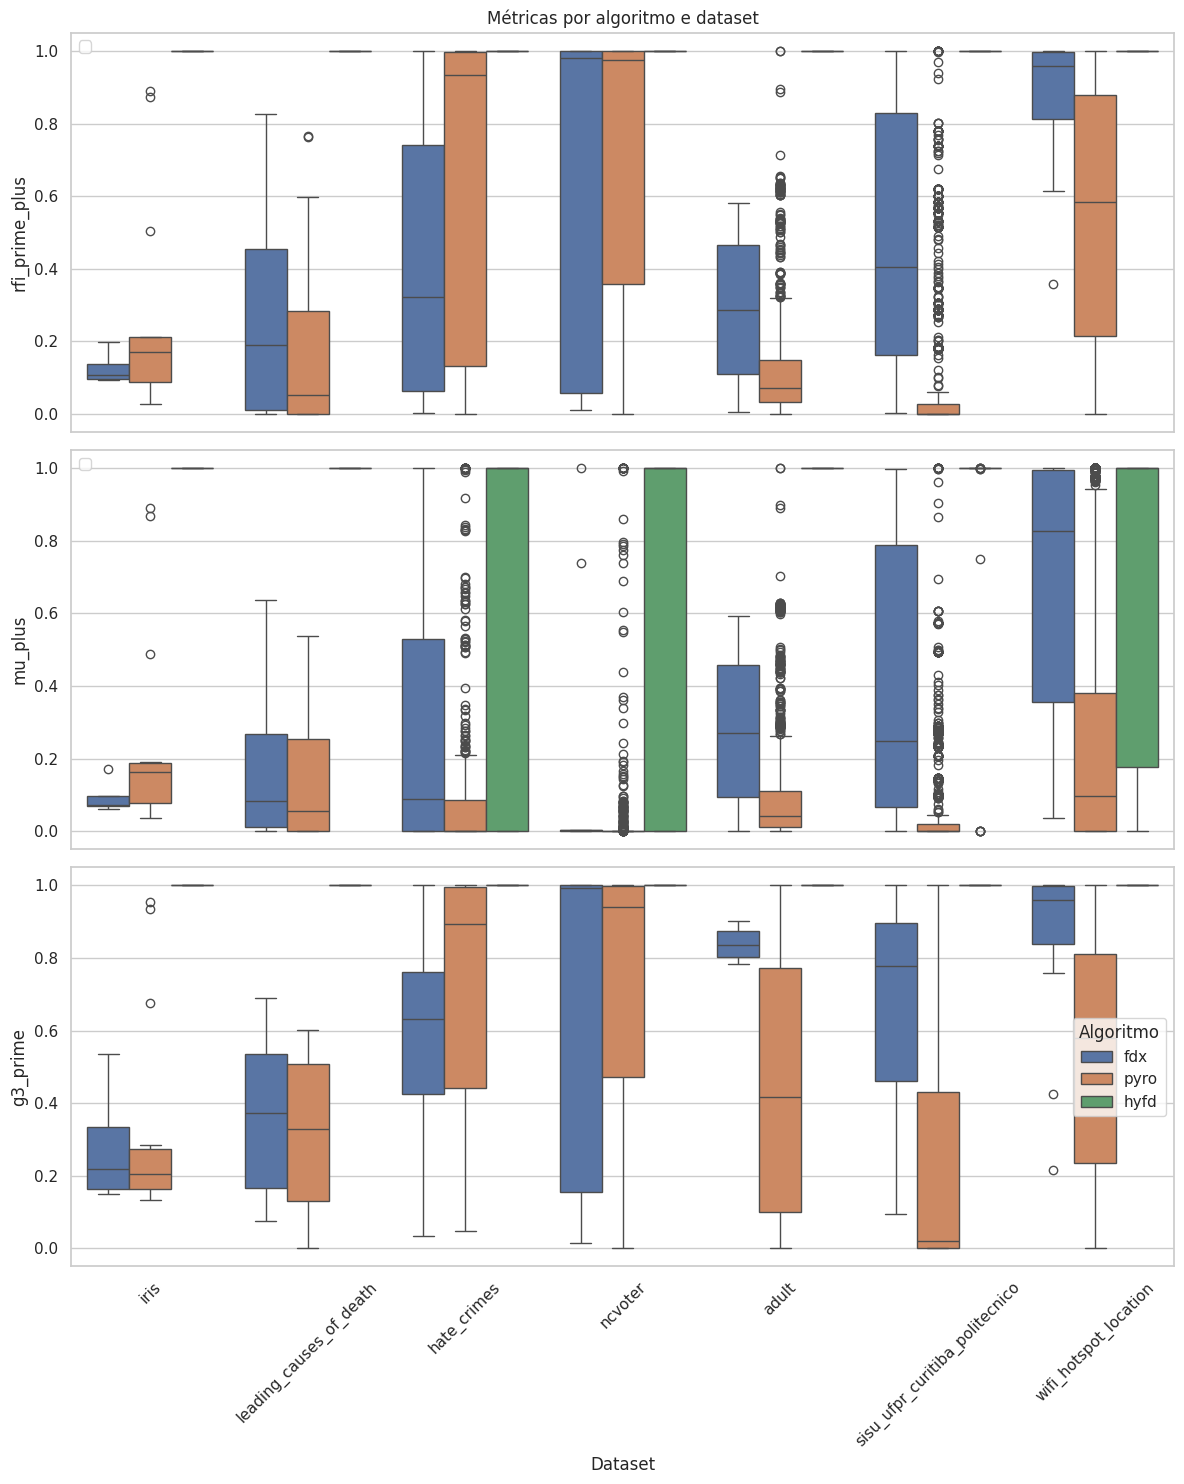

In [3]:
metrics = ["rfi_prime_plus", "mu_plus", "g3_prime"]

# Get the datasets sorted by count
sorted_datasets = counts.sort_values('num_dfs').dataset.values

sns.set(style="whitegrid")
fig, axes = plt.subplots(3, 1, figsize=(12, 15), sharey=True)

for i, metric_name in enumerate(metrics):
    # Set the order parameter to use our sorted datasets
    sns.boxplot(
        data=global_df,
        x='dataset',
        y=metric_name,
        hue='algorithm',
        order=sorted_datasets,  # Sort datasets by count
        ax=axes[i]
    )
    
    # Set title only for the first plot
    if i == 0:
        axes[i].set_title('Métricas por algoritmo e dataset')
    
    if i < 2:  # For the first two plots
        axes[i].set_xlabel('')
        axes[i].set_xticklabels([])  # Remove x-tick labels
        axes[i].legend([])

    else:  # For the bottom plot
        axes[i].set_xlabel('Dataset')
        axes[i].legend(title='Algoritmo', loc='center right')
        axes[i].set_xticklabels(axes[i].get_xticklabels(), rotation=45)
    
    axes[i].set_ylabel(metric_name)

plt.legend(title='Algoritmo', loc='center right')
plt.tight_layout()
plt.show()


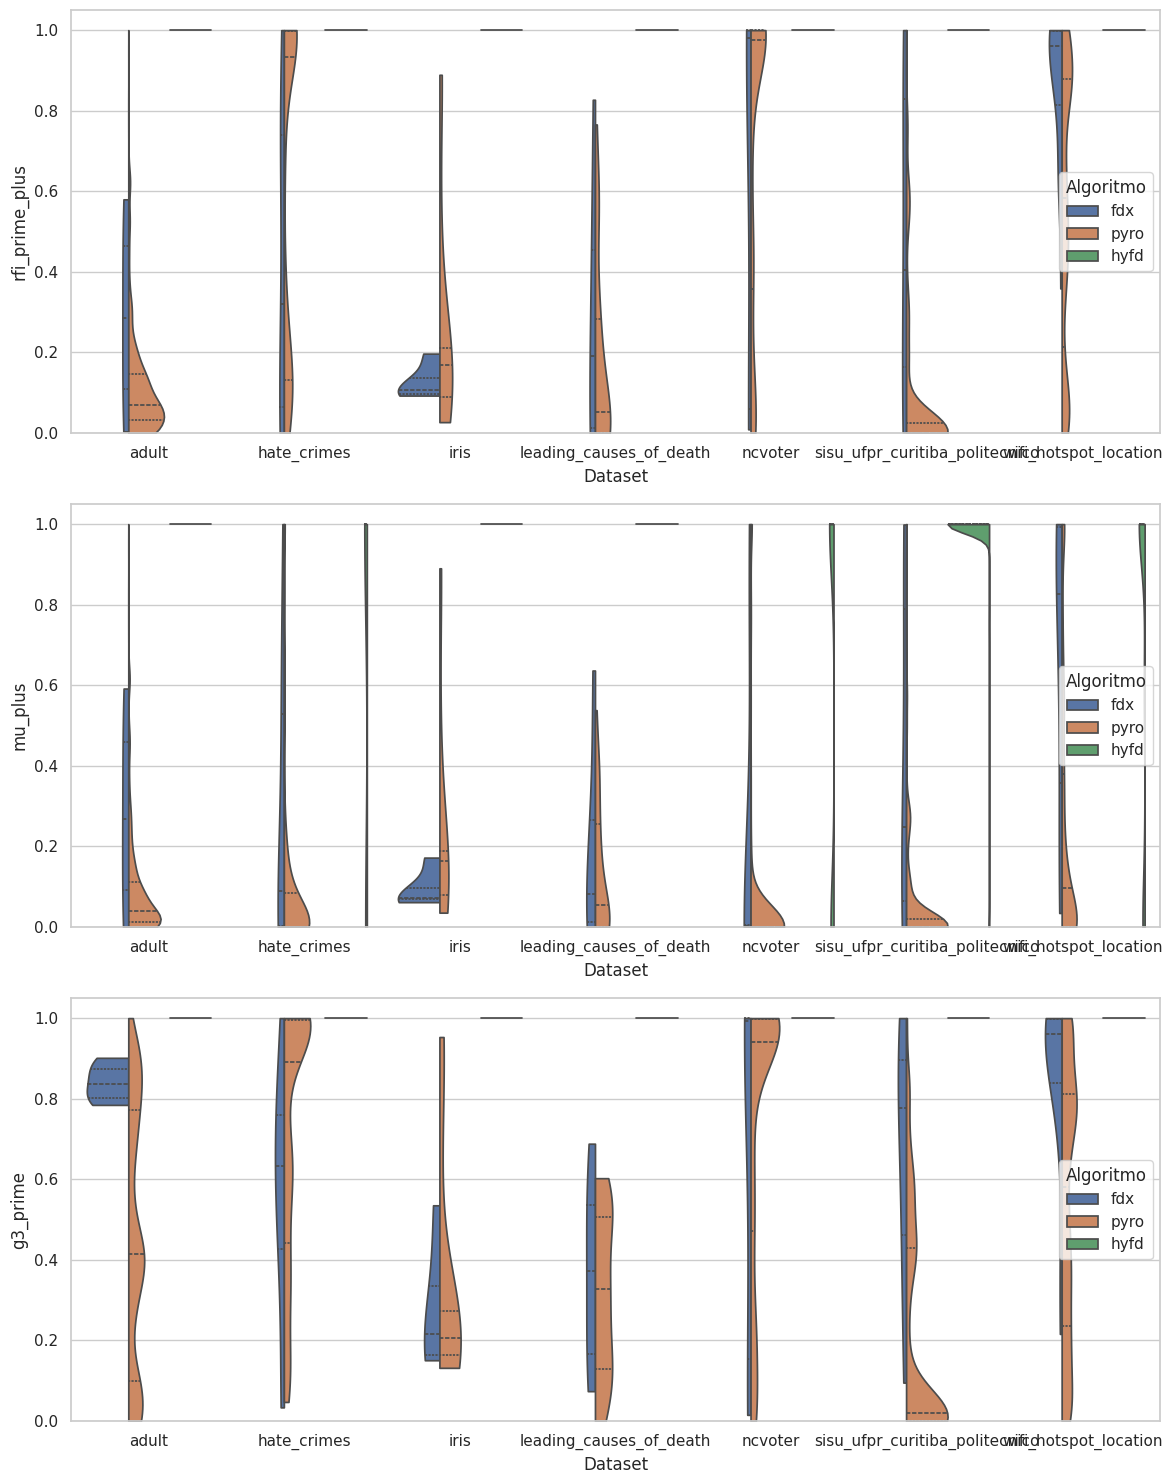

In [4]:

metrics = ["rfi_prime_plus", "mu_plus", "g3_prime"]

sns.set(style="whitegrid")
fig, axes = plt.subplots(3, 1, figsize=(12, 15))

for i, metric_name in enumerate(metrics):
    # Replace boxplot with violinplot
    ax = sns.violinplot(
        data=global_df,
        x='dataset',
        y=metric_name,
        hue='algorithm',
        split=True,  # Split the violins for better algorithm comparison
        inner='quartile',  # Show quartiles inside the violin
        ax=axes[i],
        cut=0  # Don't extend the violin past the observed data range
    )
    
    # Set y-axis limits based on actual data range
    min_val = global_df[metric_name].min()
    max_val = global_df[metric_name].max()
    # Add a small buffer (5% of range) for readability
    buffer = (max_val - min_val) * 0.05
    axes[i].set_ylim(max(0, min_val - buffer), max_val + buffer)
    
    # Set appropriate titles and labels
    axes[i].set_ylabel(metric_name)
    axes[i].set_title('')
    
    # if i < 2:  # For the first two plots
    #     axes[i].set_xlabel('')
    #     axes[i].set_xticklabels([])  # Remove x-tick labels
    #     axes[i].legend([])

    # else:  # For the bottom plot
    #     axes[i].set_xlabel('Dataset')
    #     axes[i].legend(title='Algoritmo', loc='center right')
    axes[i].set_xlabel('Dataset')
    axes[i].legend(title='Algoritmo', loc='center right')

# Adjust spacing between plots
plt.subplots_adjust(hspace=0.1)  # Reduce vertical space between plots

plt.tight_layout()  # No need for rect parameter since we're not making room for external legend
plt.show()
